In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data_set = pd.read_csv('Position_Salaries.csv')

In [4]:
data_set.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
x = data_set.iloc[:,1:-1].values
y = data_set.iloc[:,-1].values

In [6]:
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [8]:
#transform the y values to two dimensional array

y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [9]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [11]:
print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [12]:
from sklearn.svm import SVR

In [13]:
svregressor = SVR(kernel = 'rbf')
svregressor.fit(x,y)

/Users/rayaru/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
svregressor.predict(sc_x.transform([[6.5]]))

array([-0.27861589])

In [16]:
#inversing the scaled valued of y 
sc_y.inverse_transform(svregressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

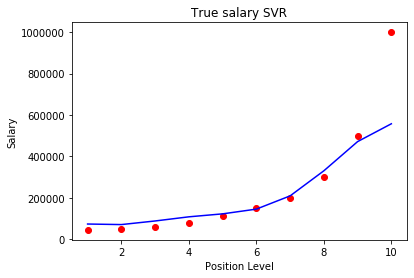

In [24]:
#visualisation of SVR result

plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(svregressor.predict(x)), color = 'blue')
plt.title('True salary SVR')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
